<a href="https://colab.research.google.com/github/hduongck/AI-ML-Learning/blob/master/2019%20Fastai%20Deep%20Learning/2019_Deep_Learning_6_ConvNet_DataAugmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data augmentation [56:45](https://youtu.be/U7c-nYXrKD4?t=3405)

The next kind of regularization we're going to look at is data augmentation. Data augmentation is one of the least well studied types of regularization, but it's the kind that I think I'm kind of the most excited about. The reason I'm kind of the most about it is that there's basically almost no cost to it. You can do data augmentation and get better generalization without it taking longer to train, without underfitting (to an extent, at least). So let me explain.

[lesson6-pets-more.ipynb](https://github.com/fastai/course-v3/blob/master/nbs/dl1/lesson6-pets-more.ipynb)

What we're going to do now is we're going to come back to a computer vision, and we're going to come back to our pets data set again. So let's load it in. Our pets data set, the images are inside the **images** subfolder:

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *

In [0]:
bs = 64

In [0]:
path = untar_data(URLs.PETS)/'images'

I'm going to call **get_transforms** as per usual, but when we call **get_transforms** there's a whole long list of things that we can provide:

In [0]:
tfms = get_transforms(
)

So far, we haven't been varying that much at all. But in order to really understand **data augmentation**, I'm going to kind of ratchet up all of the defaults. There's a parameter here for what's the probability of an affine transform happening, what's the probability of a lighting transfer happening, so I set them both to 1. So they're all gonna get transformed, I'm going to do more rotation, more zoom, more lighting transforms, and more warping.

What are all those mean? Well, you should check the documentation, and to do that, by typing doc and there's the brief documentation:

![alt text](https://github.com/hiromis/notes/raw/master/lesson6/21.png?raw=True)

But the real documentation is in docs. so I'll click on Show in docs and here it is. This tells you what all those do, but generally the most interesting parts of the docs tend to be at the top where you kind of get the summaries of what's going on.

Here, there's something called [List of transforms](https://docs.fast.ai/vision.transform.html#List-of-transforms) and you can see every transform has something showing you lots of different values of it.

![alt text](https://github.com/hiromis/notes/blob/master/lesson6/22.png?raw=true)

Here's brightness. So make sure you read these, and remember these notebooks, you can open up and run this code yourself and get this output. All of these HTML documentation documents are auto-generated from the notebooks in the **docs_source** directory in the fast.ai repo. So you will see the exact same cats, if you try this. Sylvain really likes cats, so there's a lot of cats in the documentation, and because he's been so awesome at creating great documentation, he gets to pick the cats.

So for example, looking at different values of brightness, what I do here is I look to see two things. The first is for which of these levels of transformation is it still clear what the picture is a picture of. The left most one is kind of getting to a point where it's pretty unclear, the right most one is possibly getting a little unclear. The second thing I do is I look at the actual data set that I'm modeling or particularly the data set that I'll be using as validation set, and I try to get a sense of what the variation (in this case) in lighting is.

[1:00:12](https://youtu.be/U7c-nYXrKD4?t=3612)

So when they are nearly all professionally taking photos, I would probably want them all to be about in the middle. But if the photos are taken by some pretty amateur photographers, there are likely to be some that are very overexposed, some very underexposed. So you should pick a value of this data augmentation for brightness that both allows the image to still be seen clearly, and also represents the kind of data that you're going to be using this to model it in practice.

![alt text](https://github.com/hiromis/notes/raw/master/lesson6/23.png?raw=true)

You kind of see the same thing for contrast. It'd be unusual to have a data set with such ridiculous contrast, but perhaps you do - in which case, you should use data augmentation up to that level. But if you don't, then you shouldn't.

![](https://github.com/hiromis/notes/raw/master/lesson6/24.png?raw=true)

You can pick zeros, you can pick border which just replicates, or you can pick reflection which as you can see is it's as if the last little few pixels are in a mirror. **Reflection is nearly always better, by the way**. I don't know that anybody else has really studied this, but we have studied it in some depth. **We haven't actually written a paper about it, but just enough for our own purposes to say reflection works best most of the time**. So that's the default.

Then there's a really cool bunch of perspective warping ones which I'll probably show you by using **symmetric warp**.

![](https://github.com/hiromis/notes/blob/master/lesson6/26.png?raw=true)

We've added black borders to this so it's more obvious for what's going on. As you can see, **what symmetric warp is doing is as if the camera is being moved above or to the side of the object, and literally warping the whole thing like that**. The cool thing is that as you can see, each of these pictures is as if this cat was being taken kind of from different angles, so they're all kind of optically sensible. And this is a really great type of data augmentation. It's also one which I don't know of any other library that does it or at least certainly one that does it in a way that's both fast and keeps the image crisp as it is in fast.ai, so this is like if you're looking to win a Kaggle competition, this is the kind of thing that's going to get you above the people that aren't using the fast.ai library.

Having looked at all that, we are going to have a little **get_data** function that just does the usual data block stuff, but **we're going to add padding mode explicitly so that we can turn on padding mode of zeros** just so we can see what's going on better.



In [0]:
src = ImageList.from_folder(path).split_by_rand_pct(0.2,seed=2)

In [0]:
def get_data(size,bs,padding_mode='reflection'):
    return (src.label_from_re(r'([^/]+)_\d+.jpg$')
           .transform(tfms,size=size,padding_mode=padding_mode)
           .databunch(bs=bs).normalize(imagenet_stats))

In [0]:
data = get_data(224,bs,'zeros')

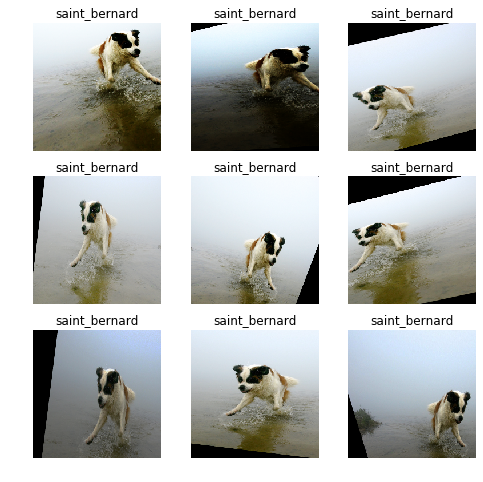

In [0]:
def _plot(i,j,ax):
    x,y = data.train_ds[3]
    x.show(ax,y=y)
    
plot_multi(_plot,3,3,figsize=(8,8))

Fast.ai has this handy little function called plot_multi which is going to create a 3 by 3 grid of plots, and each one will contain the result of calling this `(_plot)` function which will receive the plot coordinates and the axis. So I'm actually going to plot the exact same thing in every box, but because this is a training data set, it's going to use data augmentation. You can see the same doggie using lots of different kinds of data augmentation. So you can see why this is going to work really well. Because these pictures all look pretty different. But we didn't have to do any extra hand labeling or anything. They're like free extra data. So data augmentation is really really great.

One of the big opportunities for research is to figure out ways to do data augmentation in other domains. **So how can you do data augmentation with text data, or genomic data, or histopathology data, or whatever. Almost nobody's looking at that, and to me, it's one of the biggest opportunities that could let you decrease data requirements by like five to ten X.**

In [0]:
data = get_data(224,bs)

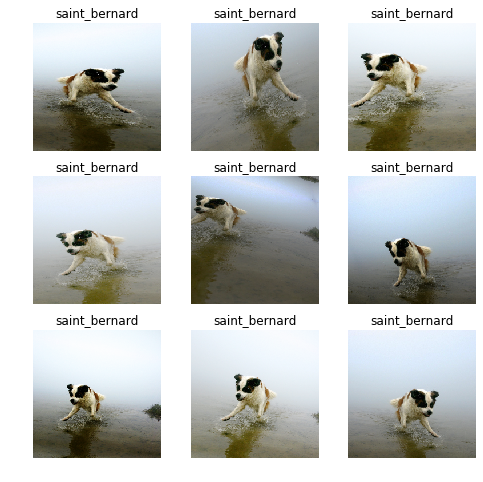

In [0]:
plot_multi(_plot,3,3,figsize=(8,8))

**Here's the same thing again, but with reflection padding instead of zero padding**. and you can kind of see like this doggies legs are actually being reflected at the bottom (bottom center). So reflection padding tends to create images that are much more naturally reasonable. In the real world, you don't get black borders. So they do seem to work better.

#Convolutional Neural Network [1:05:14](https://youtu.be/U7c-nYXrKD4?t=3914)

Because we're going to study convolutional neural networks, we are going to create a convolutional neural network. You know how to create them, so I'll go ahead and create one. I will fit it for a little bit. I will unfreeze it, I will then create a larger version of the data set 352 by 352, and fit for a little bit more, and I will save it.

In [0]:
gc.collect()

29011

In [0]:
learn = cnn_learner(data,models.resnet34,metrics=error_rate,bn_final=True)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:04<00:00, 21604710.54it/s]


In [0]:
learn.fit_one_cycle(3,slice(1e-2),pct_start=0.8)

epoch,train_loss,valid_loss,error_rate,time
0,2.551581,1.298056,0.258457,01:31
1,1.514992,0.355794,0.089986,01:32
2,0.917459,0.298231,0.073748,01:33


In [0]:
learn.unfreeze()
learn.fit_one_cycle(2,max_lr=slice(1e-6,1e-3),pct_start=0.8)

epoch,train_loss,valid_loss,error_rate,time
0,0.710326,0.316536,0.073748,01:34
1,0.655270,0.302787,0.071719,01:34


In [0]:
data = get_data(352,bs)
learn.data=data

In [0]:
learn.fit_one_cycle(2,max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.611305,0.285112,0.062246,02:48
1,0.597437,0.278922,0.058863,02:48


In [0]:
learn.save('352')

##Make a heatmap picture from scratch:

We have a CNN. And we're going to try and figure out what's going on in our CNN. The way we're going to try and figure it out is specifically that we're going to try to learn how to create this picture:

![alt text](https://github.com/hiromis/notes/blob/master/lesson6/29.png?raw=true)

This is a heat map. This is a picture which shows me what part of the image did the CNN focus on when it was trying to decide what this picture is. **We're going to make this heat map from scratch**.

We're kind of at a point now in the course where I'm assuming that if you've got to this point and you're still here, thank you, then you're interested enough that you're prepared to dig into some of these details. So we're actually going to learn how to create this heat map without almost any fast.ai stuff. We're going to use pure tensor arithmetic in PyTorch, and we're going to try and use that to really understand what's going on.

To warn you, none of it is rocket science, but a lot of it is going to look really new so don't expect to get it the first time, but expect to listen, jump into the notebook, try a few things, test things out, look particularly at tensor shapes and inputs and outputs to check your understanding, then go back and listen again. Try it a few times because you will get there. It's just that there's going to be a lot of new concepts because we haven't done that much stuff in pure PyTorch.



## Understand convolutional neural networks [1:07:32](https://youtu.be/U7c-nYXrKD4?t=4052)

Let's learn about convolutional neural networks. The funny thing is it's pretty unusual to get close to the end of a course, and only then look at convolutions. But when you think about it, knowing actually how batch norm works, how dropout works, or how convolutions work isn't nearly as important as knowing how it all goes together, what to do with them, and how to figure out how to do those things better. But we're at a point now where we want to be able to do things like heatmap. And although we're adding this functionality directly into the library so you can run a function to do that, the more you do, the more you'll find things that you want to do a little bit differently to how we do them, or there'll be something in your domain where you think "oh, I could do a slight variation of that." So you're getting to a point in your experience now where it helps to know how to do more stuff yourself, and that means you need to understand what's really going on behind the scenes.

![alt text](https://github.com/hiromis/notes/blob/master/lesson6/30.png?raw=true)

But rather than doing a matrix multiply, we're actually going to do, instead, a convolution. A convolution is just a kind of matrix multiply which has some interesting properties.

![alt text](https://github.com/hiromis/notes/blob/master/lesson6/31.png?raw=true)

You should definitely check out this website [http://setosa.io/ev/image-kernels/](http://setosa.io/ev/image-kernels/) (ev stands for explain visually) where we have stolen this beautiful animation. It's actually a JavaScript thing that you can actually play around with yourself in order to show you how convolutions work. It's actually showing you a convolution as we move around these little red squares.

Here's a picture - a black and white or grayscale picture. Each 3x3 bit of this picture as this red thing moves around, it shows you a different 3x3 part (the bottom matrix). It shows you over here the value of the pixels. In fast.ai's case, our pixel values are between 0 to 1, in this case they are between 0 to 255.So here are nine pixel values (the bottom matrix). This area is pretty white, so they're pretty high numbers.

As we move around, you can see the nine big numbers change, and you can also see their colors change. Up here is another nine numbers, and you can see those in the little x1 x2 x1 in the bottom matrix. What you might see going on is as we move this little red block, as these numbers change, we then multiply them by the corresponding numbers in the upper matrix. So let's start using some nomenclature.

**The thing up here, we are going to call the kernel - the convolutional kernel**. So we're going to take each little 3x3 part of this image, and we're going to do an element-wise multiplication of each of the 9 pixels that we are mousing over with each of the 9 items in our kernel. Once we multiply each set together, we can then add them all up. And that is what's shown on the right. As the little bunch of red things move on the left, you can see there's one red thing that appears on the right. The reason there's one red thing over here is because each set of 9, after getting through the element-wise multiplication with the kernel, get added together to create one output. Therefore the size of the left image has one pixel less on each edge than the original, as you can see. See how there's black borders on it? That's because at the edge the 3x3 kernel, can't quite go any further. So the furthest you can go is to end up with a dot in the middle just off the corner.

So why are we doing this? Well, perhaps you can see what's happened. This face has turned into some white parts outlining the horizontal edges. How? Well, the how is just by doing this element wise multiplication of each set of 9 pixels with this kernel, adding them together, and sticking the result in the corresponding spot over here. Why is that creating white spots where the horizontal edges are? Well, let's think about it. Let's look up here (the top of the head):

![](https://github.com/hiromis/notes/blob/master/lesson6/32.png?raw=true)

if we're just in this little bit here, then the spots above it are all pretty white, so they have high numbers. so the bits above it (i.e. the big numbers) are getting multiplied by (1 2 1). So that's going to create a big number. And the ones in the middle are all zeros, so don't care about that. And then the ones underneath are all small numbers because they're all close to 0, so that really doesn't do much at all. Therefore that little set there is going to end up with bright white. Whereas on the other side right down here (the hairline), you've got light pixels underneath, so they're going to get a lot of negative; dark pixels on top which are very small, so not much happens. Therefore, we're going to end up with very negative output.

This thing where we take each 3x3 area, and element wise multiply them with a kernel, and add each of those up together to create one output is called a convolution. That's it. That's a convolution. That might look familiar to you, because what we did back a while ago is we looked at that Zeiler and Fergus paper where we saw like each different layer and we visualized what the weights were doing. Remember how the first layer was basically finding diagonal edges and gradient? That's because that's all a convolution can do. Each of our layers is just a convolution. So the first layer can do nothing more than this kind of thing (e.g. finding top edges). But the nice thing is, the next layer could then take the results of this, and it could kind of combine one channel (the output of one convolutional field is called a channel), so it could take one channel that found top edges and another channel that finds left edges, and then the layer above that could take those two as input and create something that finds top left corners as we saw when we looked at Zeiler and Fergus visualizations.

[1:15:02](https://youtu.be/U7c-nYXrKD4?t=4502)

Let's take a look at this from another angle or quite a few other angles. We're going to look at [a fantastic post from Matt Kleinsmith](https://medium.com/impactai/cnns-from-different-viewpoints-fab7f52d159c) who was actually a student in the first year we did this course. He wrote this as a part of his project work back then.

![](https://github.com/hiromis/notes/raw/master/lesson6/33.png?raw=true)


What he's going to show here is here is our image. It's a 3 by 3 image (middle) and our kernel is a 2 by 2 kernel (left). What we're going to do is we're going to apply this kernel to the top left 2x2 part of this image. So the pink bit will be correspondingly multiplied by the pink bit, the green by the green, and so forth. And they all get added up together to create this top left in the output. In other words:

![](https://github.com/hiromis/notes/blob/master/lesson6/34.png?raw=true)

b is a bias so that's fine. That's just a normal bias. So you can see how basically each of these output pixels is the result of some different linear equation. And you can see these same four weights are being moved around, because this is our convolutional kernel.

![](https://github.com/hiromis/notes/raw/master/lesson6/35.png?raw=true)

Here is another way of looking at it which is here is a classic neural network view. Now P is result of multiplying every one of these inputs by a weight and then adding them all together, except the gray ones are going to have a value of zero. Because remember, P was only connected to A B D and E. In other words, remembering that this represents a matrix multiplication, therefore we can represent this as a matrix multiplication.

![](https://github.com/hiromis/notes/blob/master/lesson6/36.png?raw=true)

Here is our list of pixels in our 3x3 image flattened out into a vector, and here is a matrix vector multiplication plus bias. Then, a whole bunch of them, we're just going to set to zero. So you can see here we've got:

![](https://github.com/hiromis/notes/blob/master/lesson6/37.png?raw=true)

which corresponds to

![](https://github.com/hiromis/notes/blob/master/lesson6/38.png?raw=true)

In other words, a convolution is just a matrix multiplication where two things happen:

- some of the entries are set to zero all the time
- all of the ones are the same color, always have the same weight

So when you've got multiple things with the same weight, that's called **weight tying**.

**Clearly we could implement a convolution using matrix multiplication, but we don't because it's slow**. So in practice, our libraries have specific convolution functions that we use. 

**And they're basically doing this**, 

![alt text](https://github.com/hiromis/notes/blob/master/lesson6/31.png?raw=true)

**which is this**

![](https://github.com/hiromis/notes/raw/master/lesson6/33.png?raw=true)

**which is this equation **

![](https://github.com/hiromis/notes/blob/master/lesson6/34.png?raw=true)

**which is the same as this matrix multiplication.**

![](https://github.com/hiromis/notes/blob/master/lesson6/36.png?raw=true)

**Padding**

![](https://github.com/hiromis/notes/blob/master/lesson6/39.png?raw=true)

As we discussed, we have to think about padding because if you have a 3 by 3 kernel and a 3 by 3 image, then that can only create one pixel of output. There's only one place that this 3x3 can go. So if we want to create more than one pixel of output, we have to do something called padding which is to put additional numbers all around the outside. What most libraries do is that they just put a bunch of zeros of all around the outside. So for 3x3 kernel, a single zero on every edge piece here. Once you've padded it like that, you can now move your 3x3 kernel all the way across, and give you the same output size that you started with.

As we mentioned, in fast.ai, we don't normally necessarily use zero padding. Where possible, we use reflection padding, although for these simple convolutions, we often use zero padding because it doesn't matter too much in a big image. It doesn't make too much difference.

So that's what a convolution is. A convolutional neural network wouldn't be very interesting if it can only create top edges. So we have to take it a little bit further.







##ConvNet in practice

![](https://github.com/hiromis/notes/blob/master/lesson6/whiteboard.gif?raw=true)

If we have an input, and it might be a standard kind of red-green-blue picture. Then we can create a 3x3 kernel like so, and then we could pass that kernel over all of the different pixels. But if you think about it, we actually don't have a 2D input anymore, we have a 3D input (i.e. a rank 3 tensor). So we probably don't want to use the same kernel values for each of red and green and blue, because for example, if we're creating a green frog detector, we would want more activations on the green than we would on the blue. Or if we're trying to find something that could actually find a gradient that goes from green to blue, then the different kernels for each channel need to have different values in. Therefore, we need to create a 3 by 3 by 3 kernel. This is still our kernel, and we're still good a very it across the height and the width. But rather than doing an element-wise multiplication of 9 things, we're going to do an element-wise multiplication of 27 things (3 by 3 by 3) and we're still going to then add them up into a single number. As we pass this cube over this and the kind of like a little bit that's going to be sitting behind it (the yellow cube). As we do that part of the convolution, it's still going to create just one number because we do an element-wise multiplication of all 27 and add them all together.

We can do that across the whole single unit padded input. We started with 5 by 5, so we're going to end up with an output that's also 5 by 5. But now our input was 3 channels and our output is only one channel. We're not going to be able to do very much with just one channel, because all we've done now is found the top edge. How are we going to find a side edge? and a gradient? and an area of constant white? Well, we're going to have to create another kernel, and we're going to have to do that convolved over the input, and that's going to create another 5x5. Then we can just stack those together across this as another axis, and we can do that lots and lots of times and that's going to give us another rank 3 tensor output.

That's what happens in practice. In practice, we start with an input which is H by W by (for images) 3. We pass it through a bunch of convolutional kernels, and we get to pick how many we want, and it gives us back an output of height by width by however many kernels we had, and often that might be something like 16 in the first layer. Now we've got 16 channels representing things like how much left edge was on this pixel, how much top edge was in this pixel, how much blue to red gradient was on this set of 9 pixels each with RGB.

Then you can just do the same thing. You can have another bunch of kernels, and that's going to create another output ranked 3 tensor (again height by width by whatever - might still be 16). Now what we really like to do is, as we get deeper in the network, we actually want to have more and more channels. We want to be able to find a richer and richer set of features so that as we saw in the Zeiler and Fergus paper, by layer 4 or 5, we've got eyeball detectors and fur detectors and things, so you really need a lot of channels.

**In order to avoid our memory going out of control, from time to time we create a convolution where we don't step over every single set of 3x3, but instead we skip over two at a time**. We would start with a 3x3 centered at (2, 2) and then we'd jump over to (2, 4), (2, 6), (2, 8), and so forth. **That's called a stride 2 convolution**. What that does is, it looks exactly the same, it's still just a bunch of kernels, but we're just jumping over 2 at a time. We're skipping every alternate input pixel. So the output from that will be H/2 by W/2. When we do that, we generally create twice as many kernels, so we can now have 32 activations in each of those spots. That's what modern convolutional neural networks tend to look like.

[1:26:26](https://youtu.be/U7c-nYXrKD4?t=5186)

We can actually see that if we go into our pets notebook. We grab our CNN, and we're going to take a look at this particular cat:

In [0]:
data = get_data(352,16)

In [0]:
learn = cnn_learner(data,models.resnet34,metrics = error_rate,bn_final=True).load('352')

Category Russian_Blue

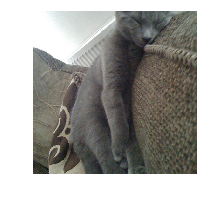

In [0]:
idx= 0 
x,y = data.valid_ds[idx]
x.show()
data.valid_ds.y[idx]

so if we go x,y = data.valid_ds some index, so it's just grab the 0th, we'll go .show and we would print out the value of y. Apparently this dog is of category Leonberger. 


In [0]:
learn.summary()

Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [64, 176, 176]       9,408      False     
______________________________________________________________________
BatchNorm2d          [64, 176, 176]       128        True      
______________________________________________________________________
ReLU                 [64, 176, 176]       0          False     
______________________________________________________________________
MaxPool2d            [64, 88, 88]         0          False     
______________________________________________________________________
Conv2d               [64, 88, 88]         36,864     False     
______________________________________________________________________
BatchNorm2d          [64, 88, 88]         128        True      
______________________________________________________________________
ReLU                 [64, 88, 88]         0          False     
______________________________________________________________

If we go **learn.summary()**, remember that our input we asked for was 352 by 352 pixels, generally speaking, the very first convolution tends to have a stride 2. So after the first layer, it's 176 by 176. learn.summary() will print out for you the output shape up to every layer.

The first set of convolutions has 64 activations. We can actually see that if we type in learn.model:

In [0]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

You can see here it's a 2D conv with 3 input channels and 64 output channels, and the stride of 2. Interestingly, it actually starts with a kernel size of 7 by 7. Nearly all of the convolutions are 3 by 3. See they are all 3 by 3? For reasons we'll talk about in part 2, we often use a larger kernel for the very first one. If you use a larger kernel, you have to use more padding, so we have to use **kernel size int divide by 2 padding** to make sure we don't lose anything.

Anyway, we're now have 64 output channels, and since it was stride 2, it's now 176 by 176. Then, as we go along, you'll see that from time to time we halve (e.g. go from 88 by 88 to 44 by 44 grid size, so that was a 2D conv) and then when we do that we generally double the number of channels.

So we keep going through a few more convs and as you can see, they've got batch norm and ReLU, that's kind of pretty standard. And eventually we do it again - another stride 2 conv which again doubles. we now got 512 by 11 by 11. And that's basically where we finish the main part of the network. We end up with 512 channels 11 by 11.

##Manual Convolutions [1:29:24](https://youtu.be/U7c-nYXrKD4?t=5364) : Make heatmap

We're actually at a point where we're going to be able to do this heat map now. So let's try and work through it. Before we do, I want to show you how you can do your own manual convolutions because it's kind of fun.

![](https://github.com/hiromis/notes/blob/master/lesson6/40.png?raw=true)



In [0]:
k = tensor([
    [0.  ,-5/3,1],
    [-5/3,-5/3,1],
    [1.  ,1   ,1],
]).expand(1,3,3,3)/6

We're going to start with this picture of a Maine Coon, and **I've created a convolutional kernel (k)**. As you can see, this one has a right edge and a bottom edge with positive numbers, and just inside that, it's got negative numbers. So I'm thinking this should show me bottom-right edges. So that's my tensor.

One complexity is that that 3x3 kernel cannot be used for this purpose, because I need two more dimensions. The first is I need the third dimension to say how to combine the red green and blue. So what I do is I say **.expand**, this is my 3x3 and I pop another three on the start. What **.expand** does is it says create a 3 by 3 by 3 tensor by simply copying this one 3 times. I mean honestly it doesn't actually copy it, it pretends to have copied it but it just basically refers to the same block of memory, so it kind of copies it in a memory efficient way. So this one here is now 3 copies of that:

In [0]:
k

tensor([[[[ 0.0000, -0.2778,  0.1667],
          [-0.2778, -0.2778,  0.1667],
          [ 0.1667,  0.1667,  0.1667]],

         [[ 0.0000, -0.2778,  0.1667],
          [-0.2778, -0.2778,  0.1667],
          [ 0.1667,  0.1667,  0.1667]],

         [[ 0.0000, -0.2778,  0.1667],
          [-0.2778, -0.2778,  0.1667],
          [ 0.1667,  0.1667,  0.1667]]]])

And the reason for that is that I want to treat red and green and blue the same way for this little manual kernel I'm showing you. Then we need one more axis because rather than actually having a separate kernel like I've kind of drawn these as if they were multiple kernels, what we actually do is we use a rank 4 tensor. The very first axis is for the every separate kernel that we have.

[1:31:30](https://youtu.be/U7c-nYXrKD4?t=5490)

In this case, I'm just going to create one kernel. To do a convolution I still have to put this unit axis on the front. So you can see **k.shape** is now [1, 3, 3, 3]:

In [0]:
k.shape

torch.Size([1, 3, 3, 3])

It's a 3 by 3 kernel. There are three of them, and then that's just the one kernel that I have. It takes a while to get the feel for these higher dimensional tensors because we're not used to writing out the 4D tensor, but just think of them like this - the 4D tensor is just a bunch of 3D tensors sitting on top of each other.

So this is our 4D tensor, and then you can just call **conv2d**, passing in some image, and so the image I'm going to use is the first part of my validation data set, and the kernel.

In [0]:
t = data.valid_ds[0][0].data; t.shape

torch.Size([3, 352, 352])

In [0]:
t[None].shape

torch.Size([1, 3, 352, 352])

In [0]:
edge = F.conv2d(t[None],k)

There's one more trick which is that in PyTorch, pretty much everything is expecting to work on a mini-batch, not on an individual thing. So in our case, we have to create a mini-batch of size 1. Our original image is 3 channels by 352 by 352 (height by width). Remember, PyTorch is channel by height by width. I need to create a rank 4 tensor where the first axis is 1. In other words, it's a mini batch of size 1, because that's what PyTorch expects. So there's something you can do in both PyTorch and numpy which is you can index into an array or a tensor with a special value **None**, and that creates a new unit axis in that point. So **t** is my image of dimensions 3 by 352 by 352. **t[None]** is a rank 4 tensor, a mini batch of one image of 1 by 3 by 352 by 352.

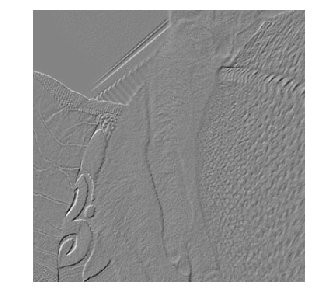

In [0]:
show_image(edge[0], figsize=(5,5));

Now I can go conv2d and get back a cat, specifically my Maine Coon. So that's how you can play around with convolutions yourself. So how are we going to do this to create a heat map?

###Creating Heat Map [1:33:50](https://youtu.be/U7c-nYXrKD4?t=5630)

This is where things get fun. Remember mentioned was that I basically have my input red green blue. It goes through a bunch of convolutional layers (let us write a little line to say a convolutional layer) to create activations which have more and more channels and smaller and smaller height by widths. Until eventually, remember we looked at the summary, we ended up with something which was 11 by 11 by 512. There's a whole bunch more layers that we skipped over.

Now there are 37 classes because data.c is the number of classes we have. And we can see that at the end here, we end up with 37 features in our model. So that means that we end up with a probability for every one of the 37 breeds of cat and dog. So it's a vector of length 37 - that's our final output that we need because that's what we're going to compare implicitly to our one hot encoded matrix which will have a 1 in the location for Maine Coon.

So somehow we need to get from this 11 by 11 by 512 to this 37. The way we do it is we actually take the average of every one of these 11 by 11 faces. We just take the mean. We're going to take the mean of this first face, take the mean, that gets this one value. Then we'll take second of the 512 faces, and take that mean, and that'll give us one more value. So we'll do that for every face, and that will give us a 512 long vector.

Now all we need to do is pop that through a single matrix multiply of 512 by 37 and that's going to give us an output vector of length 37. This step here where we take the average of each face is called **average pooling**.

![alt text](https://github.com/hiromis/notes/blob/master/lesson6/whiteboard2.gif?raw=true)

[1:36:52](https://youtu.be/U7c-nYXrKD4?t=5812)

Let's go back to our model and take a look.

![alt text](https://github.com/hiromis/notes/blob/master/lesson6/42.png?raw=true)

Here is our final 512. We will talk about what a concat pooling is in part 2, for now, we'll just focus on that this is a fast.ai specialty. Everybody else just does this **AdaptiveAvgPool2** with an output size of one.

Again, there's a bit of a special fast.ai thing that we actually have two layers here, but normally people then just have the one **Linear** layer with the input of 512 and the output of 37.

![](https://github.com/hiromis/notes/blob/master/lesson6/43.png?raw=true)

What that means is that, this little box over here (output layer) where we want a one for Maine Coon, we've got to have a box over here (last layer before output) which needs to have a high value in that place so that the loss will be low. So if we're going to have a high value there, the only way to get it is with this matrix multiplication is that it's going to represent a simple weighted linear combination of all of the 512 values here. So if we're going to be able to say I'm pretty confident this is a Maine Coon, just by taking the weighted sum of a bunch of inputs, those inputs are going to have to represent features like how fluffy is it, what color is its nose, how long is its legs, how pointy is its ears - all the kinds of things that can be used. Because for the other thing which figures out is this a bulldog, it's going to use exactly the same kind of 512 inputs with a different set of weights. Because that's all a matrix multiplication is. It's just a bunch of weighted sums - a different weighted sum for each output.

Therefore, we know that this potentially dozens or even hundreds of layers of convolutions must have eventually come up with an 11 by 11 face for each of these features saying in this little bit here, how much is that part of the image like a pointy ear, how much is it fluffy, how much is it like a long leg, how much is it like a very red nodes. That's what all of those things must represent. So each face represents a different feature. The outputs of these we can think of as different features.

![](https://github.com/hiromis/notes/blob/master/lesson6/44.png?raw=true)

What we really want to know then is not so much what's the average across the 11 by 11 to get this set of outputs. But what we really want to know is what's in each of these 11 by 11 spots. So what if instead of averaging across the 11 by 11, let's instead average across the 512. If we average across the 512, that's going to give us a single 11 by 11 matrix and each grid point in that 11 by 11 matrix will be the average of how activated was that area. When it came to figuring out that this was a Maine Coon, how many signs of Maine Coon-ishness was there in that part of the 11 by 11 grid.

That's actually what we do to create our heat map. I think maybe the easiest way is to kind of work backwards. Here's our heat map and it comes from something called average activations (**avg_acts**).

In [0]:
show_heatmap(avg_acts)

NameError: ignored

It's just a little bit of matplotlib and fast.ai.

In [0]:
def show_heatmap(hm):
    _,ax = plt.subplots()
    xb_im.show(ax)
    ax.imshow(hm, alpha=0.6, extent=(0,352,352,0),
              interpolation='bilinear', cmap='magma');

In [0]:
show_heatmap(avg_acts)

NameError: ignored

**Fast.ai** to show the image, and then matplotlib to take the heat map which we passed in which was called average activations. 

- **hm** for heat map. 
- **alpha=0.6** means make it a bit transparent, 
- and matplotlib **extent** means expand it from 11 by 11 to 352 by 352.
- Use bilinear interpolation so it's not all blocky, and use a different color map to kind of highlight things. 

That's just matplotlib - it's not important.

**The key thing here is that average activations is the 11 by 11 matrix we wanted. Here it is:**

In [0]:
avg_acts = acts.mean(0)
avg_acts.shape

NameError: ignored

Average activations' shape is 11 by 11. To get there, we took the mean of activations across dimension 0 which is what I just said - in PyTorch, the channel dimension is the first dimension, so the mean across dimension 0 took us from something of size 512 by 11 by 11 to something of 11 by 11. Therefore activations **acts** contains the activations we're averaging. Where did they come from?

In [0]:
acts = hook_a.stored[0].cpu()
acts.shape

NameError: ignored

They came from something called **a hook**. A hook is a really cool, more advanced PyTorch feature that lets you (as the name suggests) hook into the PyTorch machinery itself, and run any arbitrary Python code you want to. It's a really amazing and nifty thing. Because normally when we do a forward pass through a PyTorch module, it gives us this set of outputs. But we know that in the process, it's calculated these (512 by 11 by 11 features). So what I would like to do is I would like to hook into that forward pass and tell PyTorch "hey, when you calculate this, can you store it for me please." So what is "this"? This is the output of the convolutional part of the model. So the convolutional part of the model which is everything before the average pool is basically all of that:

![alt text](https://github.com/hiromis/notes/blob/master/lesson6/45.png?raw=true)

So thinking back to transfer learning, remember with transfer learning, we actually cut off everything after the convolutional part of the model, and replaced it with our own little bit. With fast.ai, the original convolutional part of the model is always going to be the first thing in the model. Specifically, it's always going to be called **m[0]**. In this case, I'm taking my model and I'm just going to call it **m**. So you can see m is this big thing:

![alt text](https://github.com/hiromis/notes/blob/master/lesson6/46.png?raw=true)

But always (at least in fast.ai), **m[0]** will be the convolutional part of the model. So in this case, we created a resnet34, so the main part of the ResNet34 (the pre-trained bit we hold on to) is in **m[0]**. So this is basically it. This is a printout of the ResNet34, and at the end of it there is the 512 activations.

In [0]:
m = learn.model.eval()

In [0]:
xb,_=data.one_item(x)
xb_im = Image(data.denorm(xb)[0])
xb = xb.cuda()

In [0]:
from fastai.callbacks.hooks import *

In [0]:
def hooked_backward(cat=y):
    with hook_output(m[0]) as hook_a: 
        with hook_output(m[0], grad=True) as hook_g:
            preds = m(xb)
            preds[0,int(cat)].backward()
    return hook_a,hook_g

In [0]:
hook_a,hook_g = hooked_backward()

In other words, what we want to do is we want to grab m[0] and we want to hook its output:



```
with hook_output(m[0]) as hook_a: 
```
This is a really useful thing to be able to do. So fast.ai has actually created something to do it for you which is literally you say hook_output and you pass in the PyTorch module that you want to hook the output of. Most likely, the thing you want to hook is the convolutional part of the model, and that's always going to be m[0] or learn model[0].

We give that hook a name (hook_a). Don't worry about this part (with hook_output(m[0], grad=True) as hook_g:). We'll learn about it next week. Having hooked the output, we now need to actually do the forward pass. So remember, in PyTorch, to actually get it to calculate something (i.e. doing the forward pass), you just act as if the model is a function. We just pass in our X mini-batch.

We already had a Maine Coon image called x, but we can't quite pass that into our model. It has to be normalized, turned into a mini batch, and put on to the GPU. Fast.ai has a thing called a data bunch which we have in data, and you can always say data.one_item(x) to create a mini batch with one thing in it.

As an exercise at home, you could try to create a mini batch without using data.one_item to make sure that you learn how to normalize and stuff yourself. if you want to. But this is how you can create a mini batch with just one thing in it. Then I can pop that onto the GPU by saying .cuda(). That's what I passed to my model.

The predictions that I get out, I actually don't care about because the predictions is this thing (37 long vector) which is not what I want. So I'm not actually going to do anything with the predictions. The thing I care about is the hook that it just created.

Now, one thing to be aware of is that when you hook something in PyTorch, that means every single time you run that model (assuming you're hooking outputs), it's storing those outputs. So you want to remove the hook when you've got what you want, because otherwise if you use the model again, it's going to keep hooking more and more outputs which will be slow and memory intensive. So we've created this thing (Python calls that a context manager), you can use any hook as a context manager, at the end of that with block, it'll remove the hook.

We've got our hook, so now fast.ai hooks (at least the output hooks) always give you something called .stored which is where it stores away the thing you asked it to hook. So that's where the activations now are.

1. We did a forward pass after hooking the output of the convolutional section of the model.
2. We grabbed what it stored.
3. We check the shape - it was 512 by 11 by 11 as we predicted.
4. We then took the mean of the channel axis to get an 11 by 11 tensor.
5. Then, if we look at that, that's our picture.

There's a lot to unpack. But if you take your time going through these two sections; the Convolution Kernel section and the Heatmap section of this notebook, like running those lines of code and changing them around a little bit, and remember the most important thing to look at is shape. You might have noticed. When I'm showing you these notebooks, I very often print out the shape. And when you look at this shape, you want to be looking at how many axes are there (that's the rank of the tensor) and how many things are there in each axis, and try and think why. Try going back to the print out of the summary, try going back to the actual list of the layers, and try and go back and think about the actual picture we drew, and think about what's actually going on. So that's a lot of technical content, so what I'm going to do now is switch from technical content to something much more important.
